In [1]:
# Data Manuiplation dependencies
# https://numpy.org/
import numpy as np
# https://pandas.pydata.org/
import pandas as pd 
#----------------------------------
# Visualisations dependencies
# https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 
#https://seaborn.pydata.org/
import seaborn as sns
#-------------------------------------
import warnings
import itertools
import os
#--------------------------------
sns.set(style="darkgrid")
# Modelling dependencies
#sklearn Dependencies
# All dependencies can be found here https://scikit-learn.org/stable/
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


#-----------------------------------------------------------------------
# pathing
from project_root import get_project_root
root = get_project_root()

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 90) # display all column of dataframe
pd.set_option('display.max_row', 100)
pd.set_option('display.max_colwidth', -1) 
#-----------------------------------------------------------------------

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)        


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# import data and clean it
df = pd.read_csv(root / '1.Data' / 'Covariate_Features.csv')
#df = pd.read_csv('Covariate_Features.csv')


In [4]:
df.drop(['Coordinates','Transformed_Long','Transformed_Lat','new_long','new_lat','Raster Value'],axis=1,inplace=True)
print('there are', df.shape[1], 'columns in the original dataframe')
print('there are', df.shape[0],'values in the original dataframe')
df.head()

there are 64 columns in the original dataframe
there are 47560 values in the original dataframe


,long,lat,Label,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,Band_11,Band_12,Band_13,Band_14,Band_15,Band_16,Band_17,Band_18,Band_19,Band_20,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30,Band_31,Band_32,Band_33,Band_34,Band_35,Band_36,Band_37,Band_38,Band_39,Band_40,Band_41,Band_42,Band_43,Band_44,Band_45,Band_46,Band_47,Band_48,Band_49,Band_50,Band_51,Band_52,Band_53,Band_54,Band_55,Band_56,Band_57,Band_58,Band_59,Band_60,Band_61
0,3.204167,6.911667,0,31.780069,0.739527,0.724089,2.688592,4.286776,11.415614,1.205231,2.369100,0.0,0.583,18.129000,12.066,2.265071,0.0,0.286720,103.370560,20.921000,0.464,81.175003,-0.371,29.035999,0.586,56.499001,0.646436,12.738,93.734001,10.195,0.0,0.263034,3.0,126.0,20.0,34.562562,0.852259,14.920146,4.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.233711,9.869781,0.231839,0.568856,0.774400,2.789958,20.956160,19.635271,3.0,1.0,0.0,0.000000,0.409060,-1.0
1,3.201667,6.910834,0,31.813374,0.994895,0.985522,2.950744,4.480880,11.294726,1.439247,2.656430,0.0,0.825,18.056999,12.357,1.786768,0.0,0.289738,103.442802,21.132000,0.414,80.906998,-0.293,29.257999,0.464,56.410999,0.692578,13.023,93.463997,10.131,0.0,0.263034,3.0,126.0,80.0,34.557776,0.839812,14.818560,1.0,0.000000,0.000000,0.868700,0.271277,0.686508,0.734642,0.993765,0.515353,0.763166,0.585874,0.140325,0.231277,10.191885,0.232168,0.569326,0.772752,3.045210,20.672230,19.538315,3.0,1.0,0.0,0.000000,0.405172,-1.0
2,3.202500,6.910834,0,31.773357,0.926415,0.917783,2.884460,4.443317,11.304877,1.349879,2.575939,0.0,0.743,18.049999,12.268,2.265071,0.0,0.288260,103.370560,21.089001,0.382,80.999001,-0.278,29.172001,0.464,56.409000,0.636535,12.944,93.533997,10.178,0.0,0.263034,3.0,50.0,80.0,34.558058,0.388908,14.822458,1.0,0.000000,0.000000,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.231277,10.895460,0.231948,0.569111,0.772752,2.977921,20.761681,19.540298,3.0,1.0,0.0,0.000000,0.407236,-1.0
3,3.203333,6.910834,0,31.735663,0.866177,0.854744,2.819666,4.407386,11.315222,1.260993,2.496295,0.0,0.651,18.042999,12.179,2.265071,0.0,0.286658,103.370560,21.046000,0.371,81.091003,-0.278,29.087000,0.473,56.408001,0.592647,12.864,93.603996,10.226,0.0,0.263034,3.0,50.0,80.0,34.558058,0.560225,14.828402,4.0,4.902162,13.694674,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.232287,11.379321,0.231948,0.569111,0.772752,2.917063,20.851133,19.542603,3.0,1.0,2.0,235.674698,0.407236,0.0
4,3.204167,6.910834,0,31.698177,0.811470,0.797522,2.756468,4.373125,11.326365,1.172700,2.417583,0.0,0.560,18.035999,12.089,2.265071,0.0,0.284906,103.370560,21.003000,0.371,81.182999,-0.278,29.000999,0.499,56.407001,0.559894,12.785,93.674004,10.274,0.0,0.263034,3.0,50.0,20.0,34.558058,0.730593,14.847874,6.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.232287,11.595043,0.231839,0.568856,0.774400,2.857528,20.945560,19.545317,3.0,1.0,0.0,0.000000,0.409060,-1.0


In [5]:
df.rename(columns= {'Band_1': ' fs_dist_fs_2020',
 'Band_2': ' fs_dist_hf_2019',
 'Band_3': ' fs_dist_hf1_2020',
 'Band_4': ' fs_dist_market_2020',
 'Band_5': ' fs_dist_mosques_2017',
 'Band_6': ' fs_dist_school_2020',
 'Band_7': ' fs_dist_school1_2018',
 'Band_8': ' fs_dist_well_2018',
 'Band_9': ' fs_electric_dist_2020',
 'Band_10': ' in_dist_rd_2016',
 'Band_11': ' in_dist_rd_intersect_2016',
 'Band_12': ' in_dist_waterway_2016',
 'Band_13': ' in_night_light_2016',
 'Band_14': ' ph_base_water_2010',
 'Band_15': ' ph_bio_dvst_2015',
 'Band_16': ' ph_climate_risk_2020',
 'Band_17': ' ph_dist_aq_veg_2015',
 'Band_18': ' ph_dist_art_surface_2015',
 'Band_19': ' ph_dist_bare_2015',
 'Band_20': ' ph_dist_cultivated_2015',
 'Band_21': ' ph_dist_herb_2015',
 'Band_22': ' ph_dist_inland_water_2018',
 'Band_23': ' ph_dist_open_coast_2020',
 'Band_24': ' ph_dist_riv_network_2007',
 'Band_25': ' ph_dist_shrub_2015',
 'Band_26': ' ph_dist_sparse_veg_2015',
 'Band_27': ' ph_dist_woody_tree_2015',
 'Band_28': ' ph_gdmhz_2005',
 'Band_29': ' ph_grd_water_2000',
 'Band_30': ' ph_hzd_index_2011',
 'Band_31': ' ph_land_c1_2019',
 'Band_32': ' ph_land_c2_2020',
 'Band_33': ' ph_max_tem_2019',
 'Band_34': ' ph_ndvi_2019',
 'Band_35': ' ph_pm25_2016',
 'Band_36': ' ph_slope_2000',
 'Band_37': ' po_pop_fb_2018',
 'Band_38': ' po_pop_un_2020',
 'Band_39': ' ses_an_visits_2016',
 'Band_40': ' ses_child_stunted_2018',
 'Band_41': ' ses_dpt3_2018',
 'Band_42': ' ses_hf_delivery_2018',
 'Band_43': ' ses_impr_water_src_2016',
 'Band_44': ' ses_ITN_2016',
 'Band_45': ' ses_m_lit_2018',
 'Band_46': ' ses_measles_2018',
 'Band_47': ' ses_odef_2018',
 'Band_48': ' ses_pfpr_2017',
 'Band_49': ' ses_preg_2017',
 'Band_50': ' ses_unmet_need_2018',
 'Band_51': ' ses_w_anemia_2018',
 'Band_52': ' ses_w_lit_2018',
 'Band_53': ' sh_dist_conflict_2020',
 'Band_54': ' sh_dist_mnr_pofw_2019',
 'Band_55': ' sh_dist_pofw_2019',
 'Band_56': ' sh_ethno_den_2020',
 'Band_57': ' sh_pol_relev_ethnic_gr_2019',
 'Band_58': ' uu_bld_count_2020',
 'Band_59': ' uu_bld_den_2020',
 'Band_60': ' uu_impr_housing_2015',
 'Band_61': ' uu_urb_bldg_2018'},inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head()
#df.to_csv('Covariates_w_names.csv',index=False)

,long,lat,Label,fs_dist_fs_2020,fs_dist_hf_2019,fs_dist_hf1_2020,fs_dist_market_2020,fs_dist_mosques_2017,fs_dist_school_2020,fs_dist_school1_2018,fs_dist_well_2018,fs_electric_dist_2020,in_dist_rd_2016,in_dist_rd_intersect_2016,in_dist_waterway_2016,in_night_light_2016,ph_base_water_2010,ph_bio_dvst_2015,ph_climate_risk_2020,ph_dist_aq_veg_2015,ph_dist_art_surface_2015,ph_dist_bare_2015,ph_dist_cultivated_2015,ph_dist_herb_2015,ph_dist_inland_water_2018,ph_dist_open_coast_2020,ph_dist_riv_network_2007,ph_dist_shrub_2015,ph_dist_sparse_veg_2015,ph_dist_woody_tree_2015,ph_gdmhz_2005,ph_grd_water_2000,ph_hzd_index_2011,ph_land_c1_2019,ph_land_c2_2020,ph_max_tem_2019,ph_ndvi_2019,ph_pm25_2016,ph_slope_2000,po_pop_fb_2018,po_pop_un_2020,ses_an_visits_2016,ses_child_stunted_2018,ses_dpt3_2018,ses_hf_delivery_2018,ses_impr_water_src_2016,ses_ITN_2016,ses_m_lit_2018,ses_measles_2018,ses_odef_2018,ses_pfpr_2017,ses_preg_2017,ses_unmet_need_2018,ses_w_anemia_2018,ses_w_lit_2018,sh_dist_conflict_2020,sh_dist_mnr_pofw_2019,sh_dist_pofw_2019,sh_ethno_den_2020,sh_pol_relev_ethnic_gr_2019,uu_bld_count_2020,uu_bld_den_2020,uu_impr_housing_2015,uu_urb_bldg_2018
0,3.204167,6.911667,0,31.780069,0.739527,0.724089,2.688592,4.286776,11.415614,1.205231,2.369100,0.0,0.583,18.129000,12.066,2.265071,0.0,0.286720,103.370560,20.921000,0.464,81.175003,-0.371,29.035999,0.586,56.499001,0.646436,12.738,93.734001,10.195,0.0,0.263034,3.0,126.0,20.0,34.562562,0.852259,14.920146,4.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.233711,9.869781,0.231839,0.568856,0.774400,2.789958,20.956160,19.635271,3.0,1.0,0.0,0.000000,0.409060,-1.0
1,3.201667,6.910834,0,31.813374,0.994895,0.985522,2.950744,4.480880,11.294726,1.439247,2.656430,0.0,0.825,18.056999,12.357,1.786768,0.0,0.289738,103.442802,21.132000,0.414,80.906998,-0.293,29.257999,0.464,56.410999,0.692578,13.023,93.463997,10.131,0.0,0.263034,3.0,126.0,80.0,34.557776,0.839812,14.818560,1.0,0.000000,0.000000,0.868700,0.271277,0.686508,0.734642,0.993765,0.515353,0.763166,0.585874,0.140325,0.231277,10.191885,0.232168,0.569326,0.772752,3.045210,20.672230,19.538315,3.0,1.0,0.0,0.000000,0.405172,-1.0
2,3.202500,6.910834,0,31.773357,0.926415,0.917783,2.884460,4.443317,11.304877,1.349879,2.575939,0.0,0.743,18.049999,12.268,2.265071,0.0,0.288260,103.370560,21.089001,0.382,80.999001,-0.278,29.172001,0.464,56.409000,0.636535,12.944,93.533997,10.178,0.0,0.263034,3.0,50.0,80.0,34.558058,0.388908,14.822458,1.0,0.000000,0.000000,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.231277,10.895460,0.231948,0.569111,0.772752,2.977921,20.761681,19.540298,3.0,1.0,0.0,0.000000,0.407236,-1.0
3,3.203333,6.910834,0,31.735663,0.866177,0.854744,2.819666,4.407386,11.315222,1.260993,2.496295,0.0,0.651,18.042999,12.179,2.265071,0.0,0.286658,103.370560,21.046000,0.371,81.091003,-0.278,29.087000,0.473,56.408001,0.592647,12.864,93.603996,10.226,0.0,0.263034,3.0,50.0,80.0,34.558058,0.560225,14.828402,4.0,4.902162,13.694674,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.232287,11.379321,0.231948,0.569111,0.772752,2.917063,20.851133,19.542603,3.0,1.0,2.0,235.674698,0.407236,0.0
4,3.204167,6.910834,0,31.698177,0.811470,0.797522,2.756468,4.373125,11.326365,1.172700,2.417583,0.0,0.560,18.035999,12.089,2.265071,0.0,0.284906,103.370560,21.003000,0.371,81.182999,-0.278,29.000999,0.499,56.407001,0.559894,12.785,93.674004,10.274,0.0,0.263034,3.0,50.0,20.0,34.558058,0.730593,14.847874,6.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.232287,11.595043,0.231839,0.568856,0.774400,2.857528,20.945560,19.545317,3.0,1.0,0.0,0.000000,0.409060,-1.0


In [6]:
#checking NAN on Covariate data values
null_values = df[df.isnull().any(axis=1)]
print('there are',df[df.isnull().any(axis=1)].shape[0], 'nan values in the dataframe')
print(null_values['Label'].value_counts())
df.dropna(inplace=True)
# removed Band 28 as there were nan values
df.drop([' ph_gdmhz_2005'], axis=1,inplace = True)

print('there are ',df.shape[0],'rows of data after removing nan values')

there are 1987 nan values in the dataframe
2    1986
0    1   
Name: Label, dtype: int64
there are  45573 rows of data after removing nan values


In [7]:
# select 0 and 1 classes
df =df[df['Label'].isin([0,1])]


In [8]:
#create dataframe of full dataframe long lat label
coords = df[['long','lat','Label']]
coords.shape

(15470, 3)

In [9]:
# extract coordinates of labeled data
#coords = df.copy()
#coords.set_index([' fs_dist_fs_2020', ' fs_dist_hf_2019',
#       ' fs_dist_hf1_2020', ' fs_dist_market_2020', ' fs_dist_mosques_2017',
#       ' fs_dist_school_2020', ' fs_dist_school1_2018', ' fs_dist_well_2018',
#       ' fs_electric_dist_2020', ' in_dist_rd_2016',
#       ' in_dist_rd_intersect_2016', ' in_dist_waterway_2016',
#       ' in_night_light_2016', ' ph_base_water_2010', ' ph_bio_dvst_2015',
#       ' ph_climate_risk_2020', ' ph_dist_aq_veg_2015',
#       ' ph_dist_art_surface_2015', ' ph_dist_bare_2015',
#       ' ph_dist_cultivated_2015', ' ph_dist_herb_2015',
#       ' ph_dist_inland_water_2018', ' ph_dist_open_coast_2020',
#       ' ph_dist_riv_network_2007', ' ph_dist_shrub_2015',
#       ' ph_dist_sparse_veg_2015', ' ph_dist_woody_tree_2015',
#       ' ph_grd_water_2000', ' ph_hzd_index_2011', ' ph_land_c1_2019',
#       ' ph_land_c2_2020', ' ph_max_tem_2019', ' ph_ndvi_2019',
#       ' ph_pm25_2016', ' ph_slope_2000', ' po_pop_fb_2018', ' po_pop_un_2020',
#       ' ses_an_visits_2016', ' ses_child_stunted_2018', ' ses_dpt3_2018',
#       ' ses_hf_delivery_2018', ' ses_impr_water_src_2016', ' ses_ITN_2016',
#       ' ses_m_lit_2018', ' ses_measles_2018', ' ses_odef_2018',
#       ' ses_pfpr_2017', ' ses_preg_2017', ' ses_unmet_need_2018',
#       ' ses_w_anemia_2018', ' ses_w_lit_2018', ' sh_dist_conflict_2020',
#       ' sh_dist_mnr_pofw_2019', ' sh_dist_pofw_2019', ' sh_ethno_den_2020',
#       ' sh_pol_relev_ethnic_gr_2019', ' uu_bld_count_2020',
#       ' uu_bld_den_2020', ' uu_impr_housing_2015', ' uu_urb_bldg_2018'],inplace=True)

In [10]:
# move Point label to the third column
#third_column = coords.pop('Point')
#coords.insert(3, 'Point', third_column)
#coords

In [11]:
df = df.drop(['long','lat'],axis=1)
df.head()

,Label,fs_dist_fs_2020,fs_dist_hf_2019,fs_dist_hf1_2020,fs_dist_market_2020,fs_dist_mosques_2017,fs_dist_school_2020,fs_dist_school1_2018,fs_dist_well_2018,fs_electric_dist_2020,in_dist_rd_2016,in_dist_rd_intersect_2016,in_dist_waterway_2016,in_night_light_2016,ph_base_water_2010,ph_bio_dvst_2015,ph_climate_risk_2020,ph_dist_aq_veg_2015,ph_dist_art_surface_2015,ph_dist_bare_2015,ph_dist_cultivated_2015,ph_dist_herb_2015,ph_dist_inland_water_2018,ph_dist_open_coast_2020,ph_dist_riv_network_2007,ph_dist_shrub_2015,ph_dist_sparse_veg_2015,ph_dist_woody_tree_2015,ph_grd_water_2000,ph_hzd_index_2011,ph_land_c1_2019,ph_land_c2_2020,ph_max_tem_2019,ph_ndvi_2019,ph_pm25_2016,ph_slope_2000,po_pop_fb_2018,po_pop_un_2020,ses_an_visits_2016,ses_child_stunted_2018,ses_dpt3_2018,ses_hf_delivery_2018,ses_impr_water_src_2016,ses_ITN_2016,ses_m_lit_2018,ses_measles_2018,ses_odef_2018,ses_pfpr_2017,ses_preg_2017,ses_unmet_need_2018,ses_w_anemia_2018,ses_w_lit_2018,sh_dist_conflict_2020,sh_dist_mnr_pofw_2019,sh_dist_pofw_2019,sh_ethno_den_2020,sh_pol_relev_ethnic_gr_2019,uu_bld_count_2020,uu_bld_den_2020,uu_impr_housing_2015,uu_urb_bldg_2018
0,0,31.780069,0.739527,0.724089,2.688592,4.286776,11.415614,1.205231,2.369100,0.0,0.583,18.129000,12.066,2.265071,0.0,0.286720,103.370560,20.921000,0.464,81.175003,-0.371,29.035999,0.586,56.499001,0.646436,12.738,93.734001,10.195,0.263034,3.0,126.0,20.0,34.562562,0.852259,14.920146,4.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.233711,9.869781,0.231839,0.568856,0.774400,2.789958,20.956160,19.635271,3.0,1.0,0.0,0.000000,0.409060,-1.0
1,0,31.813374,0.994895,0.985522,2.950744,4.480880,11.294726,1.439247,2.656430,0.0,0.825,18.056999,12.357,1.786768,0.0,0.289738,103.442802,21.132000,0.414,80.906998,-0.293,29.257999,0.464,56.410999,0.692578,13.023,93.463997,10.131,0.263034,3.0,126.0,80.0,34.557776,0.839812,14.818560,1.0,0.000000,0.000000,0.868700,0.271277,0.686508,0.734642,0.993765,0.515353,0.763166,0.585874,0.140325,0.231277,10.191885,0.232168,0.569326,0.772752,3.045210,20.672230,19.538315,3.0,1.0,0.0,0.000000,0.405172,-1.0
2,0,31.773357,0.926415,0.917783,2.884460,4.443317,11.304877,1.349879,2.575939,0.0,0.743,18.049999,12.268,2.265071,0.0,0.288260,103.370560,21.089001,0.382,80.999001,-0.278,29.172001,0.464,56.409000,0.636535,12.944,93.533997,10.178,0.263034,3.0,50.0,80.0,34.558058,0.388908,14.822458,1.0,0.000000,0.000000,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.231277,10.895460,0.231948,0.569111,0.772752,2.977921,20.761681,19.540298,3.0,1.0,0.0,0.000000,0.407236,-1.0
3,0,31.735663,0.866177,0.854744,2.819666,4.407386,11.315222,1.260993,2.496295,0.0,0.651,18.042999,12.179,2.265071,0.0,0.286658,103.370560,21.046000,0.371,81.091003,-0.278,29.087000,0.473,56.408001,0.592647,12.864,93.603996,10.226,0.263034,3.0,50.0,80.0,34.558058,0.560225,14.828402,4.0,4.902162,13.694674,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.232287,11.379321,0.231948,0.569111,0.772752,2.917063,20.851133,19.542603,3.0,1.0,2.0,235.674698,0.407236,0.0
4,0,31.698177,0.811470,0.797522,2.756468,4.373125,11.326365,1.172700,2.417583,0.0,0.560,18.035999,12.089,2.265071,0.0,0.284906,103.370560,21.003000,0.371,81.182999,-0.278,29.000999,0.499,56.407001,0.559894,12.785,93.674004,10.274,0.263034,3.0,50.0,20.0,34.558058,0.730593,14.847874,6.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.232287,11.595043,0.231839,0.568856,0.774400,2.857528,20.945560,19.545317,3.0,1.0,0.0,0.000000,0.409060,-1.0


In [12]:
X = df.drop('Label', axis=1)
y = df['Label']
# train, val, test split 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [13]:
# extract first covariate columns form dataframe before it is scaled
#X_val_coord = X_val[[' fs_dist_fs_2020', ' fs_dist_hf_2019']]
#X_val_coord.head()
FD = pd.DataFrame(X_val.index)
FD.rename(columns= {0:'validation_index'},inplace=True)
FD.head()

,validation_index
0,43995
1,40258
2,7237
3,44251
4,39805


In [14]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns= X.columns)
# Standardize Validation data
X_val = ss.fit_transform(X_val)
X_val_scaled = pd.DataFrame(X_val, columns= X.columns)
#Standardize Testing data
X_test = ss.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns= X.columns)

In [15]:
# extract first covariate columns form dataframe before it is scaled
#X_val_coord = X_val_scaled[[' fs_dist_fs_2020', ' fs_dist_hf_2019']]
#X_val_coord.head()

In [16]:
# Check shape of split data 
print('There are', X_train_scaled.shape[0], 'rows in the train data')
print('There are', X_val_scaled.shape[0], 'rows in the validation data')
print('There are', X_test_scaled.shape[0], 'rows in the test data')

There are 9282 rows in the train data
There are 3094 rows in the validation data
There are 3094 rows in the test data


In [17]:
# hyper parameters for testing
parameter_space = {
    'shuffle': [False],
    'activation':['relu'],
    'random_state': [42],
}

clf = MLPClassifier()

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# Run Gridsearch
gs = GridSearchCV(clf, parameter_space,
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)


# run model
gs = gs.fit(X_train_scaled, y_train)

# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.960945,"{'activation': 'relu', 'random_state': 42, 'shuffle': False}","MLPClassifier(random_state=42, shuffle=False)"


In [18]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [19]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

,Precision,Recall,F1-score
0,"[0.998020455295282, 0.9841269841269841]","[0.9996695307336417, 0.9117647058823529]","[0.9988443123658577, 0.9465648854961831]"


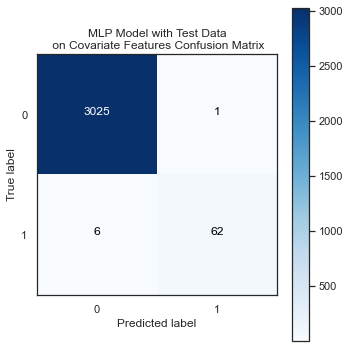

In [20]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('MLP Model with Test Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [21]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       0.98      0.91      0.95        68

    accuracy                           1.00      3094
   macro avg       0.99      0.96      0.97      3094
weighted avg       1.00      1.00      1.00      3094



# Validation data

In [22]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

,Precision,Recall,F1-score
0,"[0.9993427538613211, 0.9607843137254902]","[0.9993427538613211, 0.9607843137254902]","[0.9993427538613211, 0.9607843137254902]"


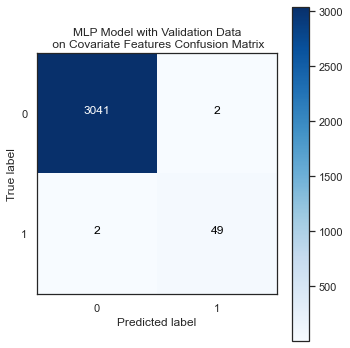

In [23]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('MLP Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [24]:
df.head()

,Label,fs_dist_fs_2020,fs_dist_hf_2019,fs_dist_hf1_2020,fs_dist_market_2020,fs_dist_mosques_2017,fs_dist_school_2020,fs_dist_school1_2018,fs_dist_well_2018,fs_electric_dist_2020,in_dist_rd_2016,in_dist_rd_intersect_2016,in_dist_waterway_2016,in_night_light_2016,ph_base_water_2010,ph_bio_dvst_2015,ph_climate_risk_2020,ph_dist_aq_veg_2015,ph_dist_art_surface_2015,ph_dist_bare_2015,ph_dist_cultivated_2015,ph_dist_herb_2015,ph_dist_inland_water_2018,ph_dist_open_coast_2020,ph_dist_riv_network_2007,ph_dist_shrub_2015,ph_dist_sparse_veg_2015,ph_dist_woody_tree_2015,ph_grd_water_2000,ph_hzd_index_2011,ph_land_c1_2019,ph_land_c2_2020,ph_max_tem_2019,ph_ndvi_2019,ph_pm25_2016,ph_slope_2000,po_pop_fb_2018,po_pop_un_2020,ses_an_visits_2016,ses_child_stunted_2018,ses_dpt3_2018,ses_hf_delivery_2018,ses_impr_water_src_2016,ses_ITN_2016,ses_m_lit_2018,ses_measles_2018,ses_odef_2018,ses_pfpr_2017,ses_preg_2017,ses_unmet_need_2018,ses_w_anemia_2018,ses_w_lit_2018,sh_dist_conflict_2020,sh_dist_mnr_pofw_2019,sh_dist_pofw_2019,sh_ethno_den_2020,sh_pol_relev_ethnic_gr_2019,uu_bld_count_2020,uu_bld_den_2020,uu_impr_housing_2015,uu_urb_bldg_2018
0,0,31.780069,0.739527,0.724089,2.688592,4.286776,11.415614,1.205231,2.369100,0.0,0.583,18.129000,12.066,2.265071,0.0,0.286720,103.370560,20.921000,0.464,81.175003,-0.371,29.035999,0.586,56.499001,0.646436,12.738,93.734001,10.195,0.263034,3.0,126.0,20.0,34.562562,0.852259,14.920146,4.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.233711,9.869781,0.231839,0.568856,0.774400,2.789958,20.956160,19.635271,3.0,1.0,0.0,0.000000,0.409060,-1.0
1,0,31.813374,0.994895,0.985522,2.950744,4.480880,11.294726,1.439247,2.656430,0.0,0.825,18.056999,12.357,1.786768,0.0,0.289738,103.442802,21.132000,0.414,80.906998,-0.293,29.257999,0.464,56.410999,0.692578,13.023,93.463997,10.131,0.263034,3.0,126.0,80.0,34.557776,0.839812,14.818560,1.0,0.000000,0.000000,0.868700,0.271277,0.686508,0.734642,0.993765,0.515353,0.763166,0.585874,0.140325,0.231277,10.191885,0.232168,0.569326,0.772752,3.045210,20.672230,19.538315,3.0,1.0,0.0,0.000000,0.405172,-1.0
2,0,31.773357,0.926415,0.917783,2.884460,4.443317,11.304877,1.349879,2.575939,0.0,0.743,18.049999,12.268,2.265071,0.0,0.288260,103.370560,21.089001,0.382,80.999001,-0.278,29.172001,0.464,56.409000,0.636535,12.944,93.533997,10.178,0.263034,3.0,50.0,80.0,34.558058,0.388908,14.822458,1.0,0.000000,0.000000,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.231277,10.895460,0.231948,0.569111,0.772752,2.977921,20.761681,19.540298,3.0,1.0,0.0,0.000000,0.407236,-1.0
3,0,31.735663,0.866177,0.854744,2.819666,4.407386,11.315222,1.260993,2.496295,0.0,0.651,18.042999,12.179,2.265071,0.0,0.286658,103.370560,21.046000,0.371,81.091003,-0.278,29.087000,0.473,56.408001,0.592647,12.864,93.603996,10.226,0.263034,3.0,50.0,80.0,34.558058,0.560225,14.828402,4.0,4.902162,13.694674,0.868858,0.271756,0.688595,0.734720,0.995055,0.516355,0.765130,0.585677,0.138392,0.232287,11.379321,0.231948,0.569111,0.772752,2.917063,20.851133,19.542603,3.0,1.0,2.0,235.674698,0.407236,0.0
4,0,31.698177,0.811470,0.797522,2.756468,4.373125,11.326365,1.172700,2.417583,0.0,0.560,18.035999,12.089,2.265071,0.0,0.284906,103.370560,21.003000,0.371,81.182999,-0.278,29.000999,0.499,56.407001,0.559894,12.785,93.674004,10.274,0.263034,3.0,50.0,20.0,34.558058,0.730593,14.847874,6.0,0.000000,0.000000,0.869017,0.272429,0.690633,0.734774,0.995996,0.517588,0.766863,0.585417,0.136775,0.232287,11.595043,0.231839,0.568856,0.774400,2.857528,20.945560,19.545317,3.0,1.0,0.0,0.000000,0.409060,-1.0


In [25]:
# convert validation prediction to dataframe and join to index values 
val_pred = pd.DataFrame(y_val_pred)
val_pred = FD.merge(val_pred, left_index=True, right_index=True)
val_pred.set_index('validation_index',inplace=True)
val_pred.rename(columns={0:'Prediction'},inplace=True)
val_pred.head()

,Prediction
validation_index,
43995,0
40258,0
7237,0
44251,0
39805,0


In [26]:
coords.head()

,long,lat,Label
0,3.204167,6.911667,0
1,3.201667,6.910834,0
2,3.202500,6.910834,0
3,3.203333,6.910834,0
4,3.204167,6.910834,0


In [27]:
df_final = coords.merge(val_pred,left_index=True,right_index=True)
df_final.head()

,long,lat,Label,Prediction
1,3.201667,6.910834,0,0
10,3.204167,6.909167,0,0
25,3.204167,6.906667,0,0
28,3.207500,6.906667,0,0
34,3.206667,6.905834,0,0


In [28]:
# check to make sure there are only four incorrectly predicted values
df_final.loc[~(df_final['Label'] == df_final['Prediction'])]

,long,lat,Label,Prediction
25421,3.509167,6.590000,1,0
43538,2.947500,6.441667,0,1
47044,3.235000,6.428334,1,0
47116,3.234167,6.427500,0,1


In [29]:
#df_final.to_csv('Covariate_Predictions.csv',index=False)

In [ ]:
filename = 'Covariate_Predictions.csv'
df_final2.to_csv(root / '1.Data' / f'{filename}', index=False)